In [256]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import csv
import ast #imported to use for fetching name from the datag
ast.literal_eval
from sklearn.metrics.pairwise import cosine_similarity # to compute cosine similarity
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk 
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /Users/jamesoh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/jamesoh/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [164]:
#dataset is from kaggle: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset
movies=pd.read_csv('./data/movies_metadata.csv', low_memory=False)
keywords=pd.read_csv('./data/keywords.csv')
movies['id']=movies['id'].astype(str)
keywords['id'] = keywords['id'].astype(str)
movies=movies.merge(keywords,on='id')
movies=movies[['id','title','genres','vote_average','vote_count','keywords']]
movies.head()

,id,title,genres,vote_average,vote_count,keywords
0,862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",7.7,5415.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",6.9,2413.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",6.5,92.0,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",6.1,34.0,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",5.7,173.0,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [165]:
wl = WordNetLemmatizer()
def fetchID(obj):
    List = []
    for id in ast.literal_eval(obj):
        List.append(wl.lemmatize(str(id['name'])).replace(" ",""))
    return ' '.join(List)


In [166]:
movies['genres'] = movies['genres'].apply(fetchID)
movies['keywords'] =movies['keywords'].apply(fetchID)
movies['keywords'] = movies['keywords'].apply(lambda x: str(x.strip())) #remove spaces
# movies['keywords'] = movies['keywords'].apply(lambda x : [c.replace(" ","")for c in x])
movies.head()

,id,title,genres,vote_average,vote_count,keywords
0,862,Toy Story,Animation Comedy Family,7.7,5415.0,jealousy toy boy friendship friend rivalry boy...
1,8844,Jumanji,Adventure Fantasy Family,6.9,2413.0,boardgame disappearance basedonchildren'sbook ...
2,15602,Grumpier Old Men,Romance Comedy,6.5,92.0,fishing bestfriend duringcreditsstinger oldmen
3,31357,Waiting to Exhale,Comedy Drama Romance,6.1,34.0,basedonnovel interracialrelationship singlemot...
4,11862,Father of the Bride Part II,Comedy,5.7,173.0,baby midlifecrisis confidence aging daughter m...


In [167]:
# remove spacings
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer

# movies['genres']=movies['genres'].apply(lambda x : [i.lower()for i in x])


movies['features']=movies['genres'] +" " + movies['keywords']
movies['features'] = movies['features'].apply(lambda x: str(x).lower())
movies['features'] = movies['features'].str.replace('\d+', '',regex = False) #remove non-alphabetic words
# movies['features'] = movies['features'].apply(lambda x: wl.lemmatize(x))#stem words//reduce amount of words

movies = movies[['id','title','vote_average','vote_count','features']]

In [168]:
movies.head()

,id,title,vote_average,vote_count,features
0,862,Toy Story,7.7,5415.0,animation comedy family jealousy toy boy frien...
1,8844,Jumanji,6.9,2413.0,adventure fantasy family boardgame disappearan...
2,15602,Grumpier Old Men,6.5,92.0,romance comedy fishing bestfriend duringcredit...
3,31357,Waiting to Exhale,6.1,34.0,comedy drama romance basedonnovel interracialr...
4,11862,Father of the Bride Part II,5.7,173.0,comedy baby midlifecrisis confidence aging dau...


In [9]:
vectorizor= CountVectorizer(max_features=100000, stop_words="english") #it takes around 20 minutes since it is a big dataset
vectoredList=vectorizor.fit_transform(movies['features']).toarray()
for i in range (12596):
    print(vectorizor.get_feature_names_out()[i])


077
10thcentury
11
1500s
15thbirthday
15thcentury
16thcentury
17thcentury
18thcentury
1910s
1920s
1930s
1940s
1950s
1960s
1970s
1980s
1990s
1995
19thcentury
1stcentury
2000ad
20thcentury
21stcentury
25thcentury
2ndcentury
360video
3d
80
aachengermany
aaronswartz
abandoned
abandonedbaby
abandonedbyhusband
abandonedfactory
abandonedhouse
abandonedmine
abandonedpuppy
abandonedship
abandonedwoman
abandonment
abba
abbess
abcmovieoftheweek
abdication
abduction
abilenekansas
abilitytoremembereverything
abkhazia
abolitionist
aboriginal
aboriginalmythology
aborigine
abortion
abraham
abrahamlincoln
absentfather
absentminded
absentmindedness
absentmother
absentparent
absorbingpower
abstract
absurdhumor
absurdism
absurdist
abuse
abusedwife
abusiveboyfriend
abusivefather
abusivehusband
abusivemarriage
abusivemother
abusivestepfather
abyss
acab
acadia
acadian
acapella
acapulcomexico
acceptance
acceptingdeath
accident
accidentalcrime
accidentaldeath
accidentaldrowning
accidentalkilling
accidentallove

antiterror
antivillain
antiwar
antiwarargument
antiwarprotest
antwerp
anubis
anus
anxiety
anxietyattack
anzio
apache
apachetribe
apartheid
apartment
apartmentbuilding
apartmentcomplex
apathy
ape
apeman
apewoman
aphrodisiac
apnoe
apocalypse
apocalyptic
apollo11
apolloprogram
apollos
apologetics
apology
apoplecticstroke
apostasy
apostle
app
appalachia
appalachian
appalachiantrail
apparatsandtechnics
apparentsuicide
apparition
apparitionsofmary
appeal
appearance
applause
apple
applecider
applecomputer
applepicking
appletree
apprendista
apprentice
approach
appropriationofanotherhumanbeing
approvedschool
aprilfool
aptitudetest
apulanta
aquarium
aqueduct
arab
arabian
arabiannights
arabic
arabjewishfriendship
arabjewsconflict
arabsheik
arabspring
arachnophobia
arbitrarylaw
arcade
arcadegame
arch
archaeologicaldig
archaeologicalexpedition
archaeologist
archangelgabriel
archangelmichael
archbishop
archdiocese
archeologicaldig
archeologist
archeology
archer
archery
archipelago
architect
architec

beach
beachball
beachblanket
beachbum
beachbunny
beachhouse
beachmovie
beachparty
beachresort
beachvolley
beadle
beagle
bean
beanstalk
bear
bearattack
beard
beardedlady
bearerbonds
beartrap
beast
beastiality
beastmaster
beastofburden
beatboxing
beatcop
beaten
beatentodeath
beatgeneration
beating
beatnicks
beatnik
beautician
beautiful
beautifulbride
beautifulgirl
beautifulprincess
beautifulwoman
beauty
beautycontest
beautypageant
beautyqueencontest
beautysalon
beautystandards
beaver
beaverutah
bebop
beck
beckenbauer
becominganadult
bed
bedandbreakfast
bedandbreakfastplace
bedridden
bedroom
bedtimeprayer
bedtimestory
bee
beeattack
beef
beefcake
beegees
beehive
beekeeper
beekeeping
beeperball
beer
beerbong
beerbottle
beerconsumption
beergarden
beerkeg
beerpong
beesting
beethoven
beforecreditsstinger
befragung
beförderung
beggar
beggarclan
begging
beginning
beginswithaflashback
beginswithtext
begnadigung
beguilement
behavior
behavioraldisorders
beheaded
beheading
behemoth
behindenemylines


britishhistory
britishhorror
britishintelligence
britishlancers
britishman
britishmonarchy
britishnewwave
britishnobility
britishnoir
britishofficer
britishoverseasterritory
britishpolitician
britishpolitics
britishprimeminister
britishprison
britishpub
britishraj
britishsailor
britishsecretservice
britishsoldier
britishspy
britishstereotype
britishyouth
britnoir
britonabroad
brittany
broadcast
broadway
broadwayactor
broadwayactress
broadwaydirector
broadwaymusical
broadwayshow
broadwaystar
brochure
broken
brokenankle
brokenarm
brokenarrow
brokenbackkillings
brokenbottle
brokencellphone
brokendoll
brokendowncar
brokenengagement
brokenfamily
brokenfinger
brokenglass
brokenhand
brokenheart
brokenhill
brokenice
brokenjaw
brokenleg
brokenlizard
brokenmirror
brokenneck
brokennose
brokentrachea
brokenwrist
broker
brokerage
bromance
bronkonagurski
brontosaurus
bronx
bronzeage
brood
brooklynbridge
brooklyndodgers
brooklynnewyorkcity
broom
brothel
brothelmadam
brother
brotheragainstbrother
brot

changingthepastorfuture
channelislands
channelsurfing
chaos
chaosandmayham
chaostheory
chaotic
chapel
chaplain
chapter
chapterheadings
character
characterissubjectofcomic
characternameintitle
characterstudy
characterwithoutconscience
charade
chariot
chariotrace
charisma
charismatic
charismaticleader
charity
charlatan
charlesdarwin
charlesdegaulle
charlesdickens
charleshschneer
charlesmanson
charlesvii
charleswilleford
charliebrown
charliechan
charliechaplin
charm
charter
charterboat
charterschools
chase
chasedbyadog
chaseddownstreet
chaseontheroof
chaseontrainroof
chasesandraces
chasescence
chasescene
chasescenes
chastity
chat
chateau
chatsession
chatterbox
chauffeur
chautauqua
cheat
cheater
cheating
cheatingatcards
cheatingatexam
cheatingfiancée
cheatinghusband
cheatingonpartner
cheatingonwife
cheatingwife
cheatonhusband
cheatonwife
chechnya
checkpoint
checkpointcharlie
checksandbalances
cheering
cheeringcrowd
cheerleader
cheerleading
cheese
cheesecake
cheesedream
cheetah
chef
chefin


compassion
competingbusinesses
competition
competitioninafamily
compilation
complaint
complexcharacters
complexrelationship
complicatedbirth
complicatedgermans
complicatedrelationships
complication
compliment
composer
compound
compromise
comptoncalifornia
compulsivegambler
compulsivegambling
compulsiveobsessive
computer
computeranimation
computerchip
computerclass
computercracker
computerdating
computerexpert
computerfraud
computergames
computerhacker
computerprogram
computerprogramming
computerscientist
computerscreen
computersimulation
computertape
computervirus
computerwar
computerworm
computing
comrade
comradeship
conartist
concealedidentity
concealedweapon
concentrationcamp
concentrationcampprisoner
concentrationcampsurvivor
conceptualart
concert
concertfilm
concertfootage
concerthall
concertpianist
concerttour
concertviolinist
concierge
conciliation
concord
concreteslabsbuilding
concubine
concussion
condemnedinmate
condemnedman
condition
condom
condominium
condor
conductor
coneyi

damselindistress
dance
danceact
danceband
danceclass
danceclub
dancecompany
dancecontest
dancecrew
dancedirector
dancegroup
dancehall
dancehallgirl
dancehallhostess
danceinstructor
dancelesson
dancemusic
dancenumber
danceperformance
dancer
danceritual
danceshow
dancestudio
danceteacher
dancing
dancingclass
dancingcorpse
dancinginthestreet
dancingmaster
dancingscene
dancingwhileworking
dandy
danger
dangeroflife
dangerous
dangerousanimal
dangerousdriving
dangerousmission
dangeroussideeffects
danish
danishanimation
danishhistory
danishhorror
danishsoldier
danube
dare
daredevil
darfur
daringrescue
dark
darkages
darkandstormynight
darkcarnival
darkcomedy
darkdramedy
darkfantasy
darkfuture
darkhero
darkheroine
darkhorsecomics
darkhumor
darkkiller
darkman
darkness
darkpast
darkromance
darkroom
darksecret
darksecrets
darkside
darkspore
darkweb
darthvader
darwin
date
datefromhell
daterape
dating
datingwoes
daughter
daughterofthepresident
dauphin
daverobicheaux
david
davidandgoliath
davidbowie
d

downworlder
dowry
dowsingrod
dr
dracula
draculaura
draft
draftday
draftdodger
drag
draggingsomeone
draghi
dragkings
dragnet
dragon
dragonball
dragonfly
dragonheart
dragonslayer
dragqueen
dragracer
dragracing
dragster
dragstrip
drainageproject
drama
dramaclass
dramatization
dramedy
drawbridge
drawing
drawingandpainting
drawingroom
drawn
dream
dreamalliance
dreamcometrue
dreamer
dreamgirl
dreamhouse
dreaminterpretation
dreamland
dreamlike
dreamlikeexperience
dreamsequence
dreamwithinadream
dreamworld
dredd
dresden
dress
dressing
dressingroom
dressmaker
dressshop
drifter
drifting
drill
drilling
drillingstation
drillinstructor
drillpress
drillsergeant
drink
drinking
drinkingblood
drinkingcontest
drinkinggame
drinkingstraw
drinkingsyrup
drinkingweekend
drive
drivebyshooting
driveinclassic
driveinmovie
driveninsane
drivenmad
driveovercliff
driver
driveway
driving
drivingacar
drivingatnight
drivingcap
drivinginreverse
drivingintherain
drivinglesson
drivingrange
drivingschool
drivingtest
drivi

evilpreacher
evilpriest
evilprince
evilpuppet
evilqueen
evilruler
evilspirit
evilstepmother
eviltwin
evilwitch
evilwoman
evisceration
evolution
evp
ewigejugend
ewoks
ex
exam
examination
excalibur
excavation
excercise
excess
exchange
exchangestudent
exciaagent
excitement
exclusion
excommunication
excrements
excuse
execution
executioner
executive
executivecase
exercise
exercisemachine
exfiancé
exfiancée
exgattin
exhaustion
exhibit
exhibition
exhibitionism
exhibitionist
exhusband
exile
exiledprince
existence
existentialdrama
existentialism
existentialloneliness
exit
exkgb
exmilitary
exnazi
exodus
exoneration
exorcism
exorcist
exoskeleton
exoticdancer
exoticisland
exoticlocale
exoticpet
expatriate
expectantfather
expectantgrandmother
expectantmother
expecting
expectingtwins
expedition
expelled
expelledfromschool
expense
expensiverestaurant
experience
experiment
experimental
experimentalcancertreatment
experimentaldrug
experimentalfilm
experimentalsurgery
experimentgonewrong
expert
expertma

filminafilm
filmindustry
filminfilm
filmmaker
filmmaking
filmnoir
filmonartandartist
filmpreservation
filmproducer
filmproduction
filmschool
filmscore
filmsetting
filmshoot
filmstartswithtext
filmstudent
filmstudio
filmteam
filmtheory
filmunion
filmwithinafilm
finalexam
finance
financial
financialbacker
financialcrisis
financialempire
financialjournalist
financialmarket
financialproblem
financialruin
financialtransactions
financier
findinglove
fineart
finedining
finger
fingergun
fingering
fingerprint
fingerprinting
fingerwiggle
finishingschool
finland
finnish
finnishwarchildren
finnishwinterwar
firearm
firebreathing
firebrigade
firechief
firecracker
fired
firedepartment
firedfromthejob
fireengine
fireescape
fireextinguisher
firefighter
firefighting
firefly
fireman
fireplace
firerepellent
firestorm
firetruck
firewall
firework
firingrange
firingsquad
firm
firstaid
firstamendmentrightsviolation
firstanniversary
firstclass
firstcontact
firstcrush
firstdate
firstdayofschool
firstgradeteache

geofiction
geography
geologist
geometry
georgearmstrongcuster
georgeharrison
georgelucas
georgesmelies
georgew
georgewashington
georgia
georgiaeurope
georgian
german
germanabroad
germanaccent
germanagent
germanalps
germanamerican
germanborder
germancolonialism
germancruiser
germandemocraticrepublic
germanexpressionism
germangirl
germanhistory
germanjew
germanmark
germannavy
germanoccupation
germanoccupationoffrance
germanofficer
germanpoetry
germanpolitics
germanshepherd
germansoldier
germanspy
germanstereotype
germansubmarine
germany
germwarfare
geronimo
gersontherapy
gesellschaft
gespenst
gestapo
getaway
getawaycar
getawaydriver
gettingawaywithmurder
gettinghome
gettinglost
gettingmarried
gettysburg
gettysburgaddress
gewaltimfilm
ghetto
ghettoriot
ghiblimuseum
ghidora
ghidorah
ghost
ghostbuster
ghostchild
ghosthunter
ghosthunting
ghostrider
ghostship
ghostshooter
ghostsofthepast
ghoststory
ghosttown
ghosttrain
ghostworld
ghostwriter
ghoul
gi
giallo
giant
giantanimal
giantant
giantant

heatwave
heaven
heavenandhell
heavy
heavymetal
heavyrain
heavywater
heavyweight
heavyweightboxer
heavyweightchampion
hebrew
hebrides
hecate
hechosreales
hedgefund
hedgerow
hedonism
hegemony
heidi
heilig
heilmittel
heilsarmee
heimdall
heimlichmaneuver
heir
heiress
heirloom
heirtofortune
heirtothethrone
heist
heistgonewrong
heistmovie
heldagainstwill
heldatgunpoint
heldcaptive
heldhostage
helenablavatsky
helenoftroy
helicopter
helicoptercrash
helicopterpilot
helix
hell
hellgate
hellonearth
hellsangels
hellstorming
helmet
help
helpinganimals
helpingchildren
helplessness
helsinki
helterskelter
hemingway
hemmingway
hemophagia
hemorrhage
hen
henchman
henpeckedhusband
henry
henryfordfamily
henryrifle
henryviii
hentai
hepatitis
herbalmedicines
herbalremedies
herbicide
herculepoirot
hercules
herd
hereditarydisease
heresy
heretic
herion
heritage
hermaphrodite
hermes
hermit
hero
heroesjourney
herofactory
heroicbloodshed
heroicmission
heroicrescue
heroicwoman
heroin
heroinaddict
heroinaddiction
he

inadequatepay
inanimateobjectscomingtolife
inarticulate
inbreeding
inca
incan
incantation
incarceration
incertitude
incest
incestovertones
incestvictim
incheon
incident
incinerator
incognito
income
incommunicability
incompetence
incomprehensibleplot
incredibile
incrediblebongoband
incriminate
incubus
incurabledisease
indecenttalk
indecision
independence
independencemovement
independentfilm
india
indiana
indianajones
indianajonesspoofscene
indianapacers
indianapolis
indianapolis500
indianattack
indianauniversity
indianburialground
indianchief
indianfood
indianguru
indianhistory
indianlead
indianocean
indianraid
indianreservation
indianscout
indiansummer
indiansvs
indianterritory
indiantribe
indianuprising
indianwar
indianwestern
indiefilm
indierock
indifference
indigenous
indigenousaustralians
indigenouspeoples
indiscretion
individual
individualism
individuality
indo
indochina
indoctrination
indonesia
indoorplant
industrialaccident
industrialisation
industrialist
industrialmusic
industr

justicedepartment
justinbieber
justmarried
juvenilecrime
juveniledelinquent
juveniledetention
juvenilehall
juvenileprison
juwelryheist
jönssongang
k2
ka
kabuki
kabul
kaffeehaus
kafka
kaidan
kaiju
kaiowá
kaisernero
kaiserwang
kajakiafghanistan
kalahari
kalaripayattu
kali
kama
kamikaze
kammer
kampfjet
kanarieöarna
kangaroo
kanibalismus
kansa
kansascity
kaposi
karakoram
karaoke
karaokebar
karate
karateclass
karbala
karibik
karlmay
karma
kart
kartell
kaschubia
kaserne
kashmir
kashmirconflict
kaspar
katana
katanasword
katangaconflict
katmainationalpark
kato
kayak
kayako
kazakhstan
keepsake
keg
keithallen
keithmallory
keithrichards
keks
kendo
kenia
kennedy
kennedyassassination
kennel
kensington
kentucky
kenya
keptwoman
kerala
kermit
kermitthefrog
kerouac
ketamine
ketchup
kewgardens
key
keysifightingmethod
keystonekops
keywest
kgb
kgbagent
khmerrouge
khorror
khumba
kibbutz
kick
kickass
kickboxer
kickboxing
kickedinthecrotch
kickedintheface
kickedinthegroin
kickedinthehead
kickedintheshin
kick

loincloth
loireriver
loko
lolita
lolitafashion
lollipop
lombardy
london
londonblitz
londonengland
londontheaterdistrict
londonunderground
loneliness
lonelinessinspace
lonely
lonelyhearts
lonelyheartsad
lonelyman
loner
loneranger
lonesurvivor
lonewolf
longabandoned
longblackhair
longdistancerelationship
longdistancerunning
longestfilm
longhair
longing
longisland
longjohnsilver
longlostrelative
longshoreman
longtake
longtermrelationship
longweekend
look
lookalikes
lookingatthecamera
lookingforbirthparents
lookingforlove
lookingpale
looneytunes
loop
loosecannon
loot
looting
lootsharing
lord
lordbyron
lordi
lordship
lorettalynn
lorry
losangeles
losangelesinternationalairport
losangelesriots
losangelesriver
loser
losingmoney
losingvirginity
losingweight
loss
lossofachild
lossofbrother
lossofchild
lossofdaughter
lossofenergy
lossofeyesight
lossoffaith
lossoffamily
lossoffather
lossoffortune
lossoffriend
lossofgirlfriend
lossofhusband
lossofinnocence
lossofjob
lossoflibido
lossoflovedone
loss

meetingontheinternet
megacity
megacorporation
megalomania
megalomaniac
megalomaniacal
megaphone
meijiperiod
meinhofgroup
meister
mekka
mekong
melancholy
melbourne
melbournecup
melee
melodifestivalen
melodrama
melt
meltdown
meltingglacier
meltingice
meltingicecaps
meltingpot
memberofparliament
memento
memoir
memorization
memory
memoryloss
memphis
men
menace
menageatrois
mendisguisedaswomen
mengele
meninblack
meninunderwear
mennonite
menorah
menschalsobjekt
menschheit
menstrualblood
menstruation
mental
mentalasylum
mentalbreakdown
mentalcontrol
mentaldisease
mentaldisorders
mentalhealth
mentalhealthclinic
mentalhospital
mentalillness
mentalinstability
mentalinstitution
mentalism
mentallychallenged
mentallydisabled
mentallyhandicappedman
mentallyill
mentalpatient
mentalproblems
mentaltelepathy
mentor
mentorprotégérelationship
menu
mercedes
mercedesbenz
mercenary
merchant
merchantmarine
merchantraider
mercifulness
mercilessness
mercy
mercykilling
mercypetition
merger
meritocracy
merlin
mer

muscle
musclecar
muscleman
muscular
muse
museum
mushroom
mushroomcloud
music
musical
musicalacts
musicalguest
musicalnotes
musicalnumber
musicalrevue
musicalsegments
musicalsiblings
musicalstyle
musicaltheater
musicaltones
musicband
musicbox
musicbusiness
musiccompetition
musicconcert
musiccontest
musiccritic
musicdocumentary
musicfan
musicfestival
musichall
musichistory
musician
musicianslife
musicindustry
musicinstrument
musicjournalism
musicjournalist
musiclover
musicprofessor
musicrecital
musicrecord
musicrecording
musicrehearsal
musicrights
musicsampling
musicschool
musicspoof
musicstore
musicstudio
musicstyle
musicteacher
musictour
musictvprogramme
musicvideo
musik
musikstil
musket
musketeer
muslim
muslimamerican
muslimslaver
mustache
mustang
mutant
mutantanimal
mutantbaby
mutantspider
mutated
mutation
mute
mutegirl
mutevillain
mutilation
mutiny
mvm
myanmar
mysterious
mysteriouscandle
mysteriouscharacter
mysteriousdeath
mysteriousdeaths
mysteriousdrug
mysteriousevents
mysteriousf

octopus
oddball
oddcouple
oddcrowd
oddhobby
oddjob
oddreligiouscustoms
oder
odessa
odin
odor
oedipus
oedipuscomplex
offarm
offartist
offbeat
offender
offer
offhand
offhead
office
officejob
officeofscientificinvestigation
officepolitics
officer
officerinvolvedshooting
officeromance
officetemp
offscreenrape
offseason
offthegrid
offtrackbetting
ogre
oh
ohio
oil
oilbaron
oilcompany
oilfield
oilindustry
oillamp
oilplatform
oilrefinery
oilrig
oilspill
oiltanker
oiltycoon
oilwell
okcorral
okinawa
okkupation
oklahoma
oklahomacitybombing
oktoberfest
old
oldage
oldageromance
oldbuilding
oldcar
oldcouple
olddarkhouse
olderbrother
olderbrotheryoungersister
olderhusband
oldermanyoungermanrelationship
oldermanyoungerwomanrelationship
oldermanyounggirlrelationship
olderwomanseducesyoungerguy
olderwomanyoungermanrelationship
olderwomanyoungerwomanrelationship
oldfashioned
oldflame
oldfootage
oldfriend
oldfriends
oldfriendsreunited
oldgirlfriend
oldhollywood
oldhouse
oldlady
oldmaid
oldman
oldmansion
o

In [10]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vectoredList)


In [273]:
print(similarity)

[[1.         0.09128709 0.11785113 ... 0.         0.         0.        ]
 [0.09128709 1.         0.         ... 0.         0.         0.        ]
 [0.11785113 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [274]:
def CV_recommender(movie,size,min_votes,min_rating):
    movie_index=movies[movies['title']==movie].index[0]
    distance=similarity[movie_index]
   
    movies_list=sorted(list(enumerate(distance)), reverse=True, key=lambda x : x[1])[1:size]
    
    ids = list(zip(*movies_list))[0]
    ids = list(ids)
    
    movies.sort_values(["vote_average"], 
                        axis=0,
                        ascending=[False], 
                        inplace=True)
    top_lists = []
    temp = []
    i= 0
    while len(top_lists) < 10 and i < 45450:
        temp = movies.iloc[i]
        if temp['vote_count'] > min_votes and temp['vote_average'] > min_rating:
            if int(temp['id']) in ids:
                
                top_lists.append(temp)
        i+=1
    if len(top_lists) < 10: #when not enough data has been imported
        return CV_recommender(movie,size+50,min_votes,min_rating)   #solve recursively until list size is 10
    top_lists = pd.DataFrame(top_lists)
    top_lists.head(10)
    
    return top_lists

# custumizable inputs are: key, starting movie list size, minimum vote_count, and minimum rating
key = "World War Z"
movies_list = CV_recommender(key,100,500,6.0)

print("               RECOMMENDED MOVIES")
print(movies_list[['title','vote_average']])


               RECOMMENDED MOVIES
                            title  vote_average
4149                     Scarface           8.0
761                 Trainspotting           7.8
582    Terminator 2: Judgment Day           7.7
11662                    Hot Fuzz           7.4
10880       Thank You for Smoking           7.1
9502                   Layer Cake           7.0
284          Natural Born Killers           6.9
7194    The Passion of the Christ           6.9
18143    The Adventures of Tintin           6.7
142                      Bad Boys           6.5


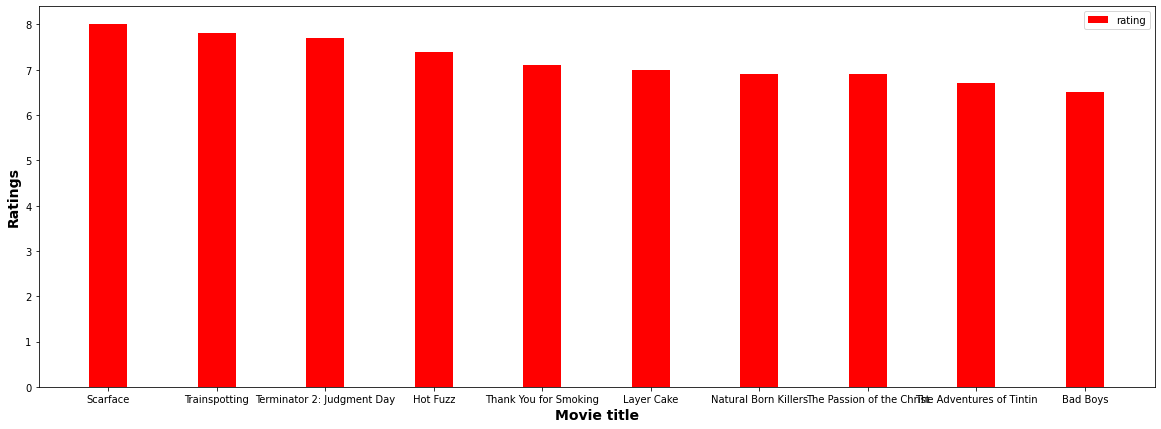

In [275]:
x = list(movies_list['title'])
rating = list(movies_list['vote_average'])

fig = plt.figure(figsize = (20, 7))
plt.xlabel('Movie title', fontweight ='bold', fontsize = 14)
plt.ylabel('Ratings', fontweight ='bold', fontsize = 14)

plt.bar(x, rating, color ='r',
        width = 0.35, label = 'rating')

plt.legend()
plt.show()


